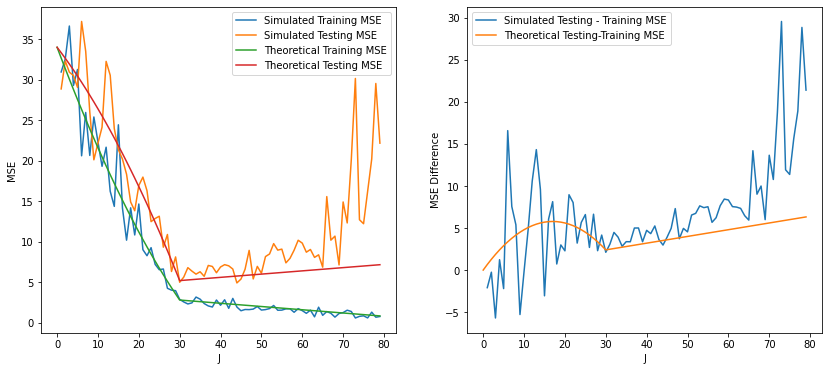

In [1]:
import numpy as np
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt

def simulate(N, C, Dx, sigmae = 1.0):
  x = np.random.normal(0, 1, N*Dx).reshape(N, Dx)
  beta = np.zeros(Dx)
  beta[0:C] = 1.0
  y = x @ beta + np.random.normal(0, 1, N)*sigmae
  return x, y

def msesim(J, N, C, Dx, sigmae = 1.0, dgp=simulate):
  x,y = dgp(N, C, Dx, sigmae=sigmae)
  xtest, ytest = dgp(N, C, Dx, sigmae=sigmae)
  model = sklearn.linear_model.LinearRegression(fit_intercept=False)
  model.fit(x[:,0:J], y)
  mse = sklearn.metrics.mean_squared_error(y, model.predict(x[:,0:J]))
  msetest = sklearn.metrics.mean_squared_error(ytest, model.predict(xtest[:,0:J]))
  return mse, msetest

N = 100
Dx = 80
C = 30
mse = np.zeros(Dx)*np.nan
msetest = np.zeros(Dx)*np.nan
sigmae = 2.0
for J in range(1,Dx):
  mse[J], msetest[J] = msesim(J, N, C, Dx, sigmae)
  
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].plot(mse, label='Simulated Training MSE')
ax[0].plot(msetest, label='Simulated Testing MSE')
ax[0].plot([(max([C-J,0])+sigmae**2)*(1-J/N) for J in range(Dx)], label='Theoretical Training MSE')
ax[0].plot([(max([C-J,0])+sigmae**2)*(1+J/N) for J in range(Dx)], label='Theoretical Testing MSE')
ax[0].set_xlabel('J')
ax[0].set_ylabel('MSE')
ax[0].legend()
ax[1].plot(msetest-mse, label='Simulated Testing - Training MSE')
ax[1].plot([(max([C-J,0])+sigmae**2)*2*J/N for J in range(Dx)], label='Theoretical Testing-Training MSE')
ax[1].set_xlabel('J')
ax[1].set_ylabel('MSE Difference')
ax[1].legend()



In [77]:
#!pip install orthnet
import orthnet

[0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.06959756 0.04639837 0.03479878
 0.02783902 0.02319919 0.01988502 0.01739939 0.01546612 0.01391951
 0.0126541  0.01159959 0.01070732 0.00994251 0.00927967 0.0086997
 0.00818795 0.00773306 0.00732606 0.00695976 0.00662834 0.00632705
 0.00605196 0.0057998  0.0055678  0.00535366 0.00515537 0.00497125
 0.00479983 0.00463984]
[0.13919512 0.13919512 0.13919512 0.13919512 0.13919512 0.13919512
 0.13919512 0.13919512 0.13919512 0.139

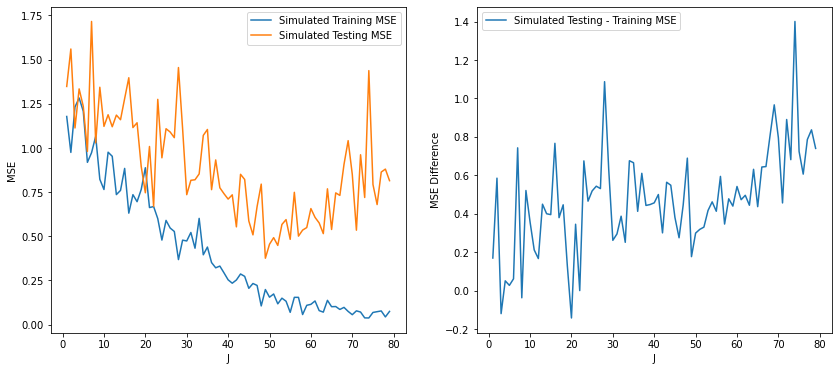

In [173]:
def simulate2(N, C, Dx, sigmae = 1.0):
  #x = 1. - 0.9*np.random.random(N)
  X = np.random.normal(0, 1, N*Dx).reshape(N, Dx)
  #y = np.cos(10*x)*np.exp(x) + np.random.normal(0, 1, N)*sigmae
  beta = np.array([1 for j in range(1,C+1)]+[1/j for j in range(1,Dx-C+1)])
  beta = beta/np.sqrt(np.sum(beta**2))
  print(beta)
  y = X @ beta + np.random.normal(0,1,N)*sigmae
  #X = orthnet.Chebyshev(x.reshape(N,1), Dx).tensor
  return X, y

N = 100
Dx = 80
C = 50
mse = np.zeros(Dx)*np.nan
msetest = np.zeros(Dx)*np.nan
sigmae = 0.5
for J in range(1,Dx):
  mse[J], msetest[J] = msesim(J, N, C, Dx, sigmae, simulate2)
  
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].plot(mse, label='Simulated Training MSE')
ax[0].plot(msetest, label='Simulated Testing MSE')
#ax[0].plot([(max([C-J,0])+sigmae**2)*(1-J/N) for J in range(Dx)], label='Theoretical Training MSE')
#ax[0].plot([(max([C-J,0])+sigmae**2)*(1+J/N) for J in range(Dx)], label='Theoretical Testing MSE')
ax[0].set_xlabel('J')
ax[0].set_ylabel('MSE')
ax[0].legend()
ax[1].plot(msetest-mse, label='Simulated Testing - Training MSE')
#ax[1].plot([(max([C-J,0])+sigmae**2)*2*J/N for J in range(Dx)], label='Theoretical Training-Testing MSE')
ax[1].set_xlabel('J')
ax[1].set_ylabel('MSE Difference')
ax[1].legend()